# Tidal Report Group Project
### By Suramya Shakya, Cole Lewis, Genevieve Garcia, and Ignacio Watlington

In [1]:
# import all needed modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

In [2]:
# open the file and create a numpy array

file = open("ASTR19_S22_group_project_data.txt", "r")
lines = file.readlines()
file.close()

time, waveheight = [], []

for line in lines[3:]:
    linedata = line.split()
    time.append((float(linedata[0])*24*60 + float(linedata[1].split(':')[0])*60 + float(linedata[1].split(':')[1])) / 60)
    waveheight.append(float(linedata[2]))

In [3]:
def f_curve(x, a, b, c, d, e, f, g):
    return a * np.sin(np.multiply(x, b)-c) + d * np.sin(np.multiply(x, e)-f) + g

2.1893334206569817 0.5063894172352338 2.7057098316013324 0.8605692196860628 0.018036636645926554 198.80463921027967 2.4593414430108393


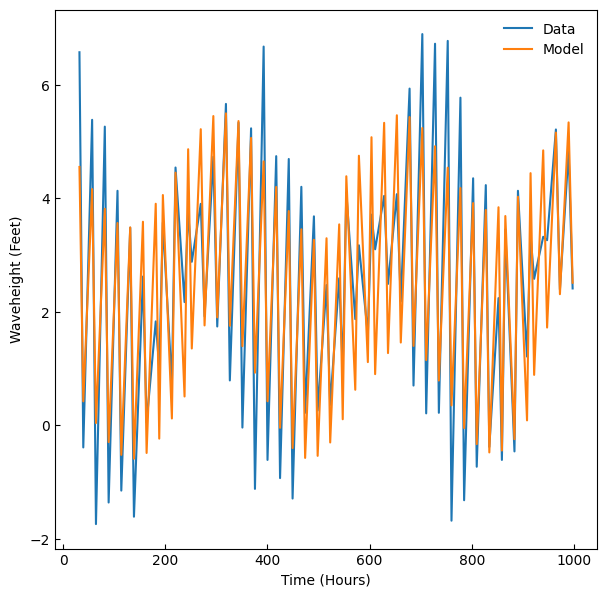

In [35]:
#Assuming root mean squared experimental error is 0.25 feet 
y_err = np.full(len(waveheight), 0.25)

#optimize function to find a best fit of our model to the data. Through trial and error, we found the values in p0 has an ok approximation to give the optimize function something to work off of
params, params_cov = optimize.curve_fit(f_curve, time, waveheight, sigma=y_err, p0=[1, 0.5, 0, 1, 0.02, 200, 2.5])

# Output from the optimze function
a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]
g_fit = params[6]

# prints the parameters of our best fit
print(a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit)

#creates the points for the best fit so we can graph it
y_fit = a_fit * np.sin(np.multiply(time, b_fit)-c_fit) + d_fit * np.sin(np.multiply(time, e_fit)-f_fit) + g_fit

#plots the data (waveheight) and the model (y_fit)
f, ax = plt.subplots(1, 1, figsize=(7,7))
ax.xaxis.set_tick_params(which='both', direction='in')
ax.yaxis.set_tick_params(which='both', direction='in')
ax.plot(time, waveheight, label="Data")
ax.plot(time, y_fit, label="Model")
ax.set_xlabel("Time (Hours)")
ax.set_ylabel("Waveheight (Feet)")
plt.legend(frameon=False)
plt.savefig("model-fit.pdf", bbox_inches="tight", facecolor="white")

In [5]:
#Residual function
def residual(a,b):
    c = []
    for i in range(len(a)):
        c.append(b[i]-a[i])
    return c


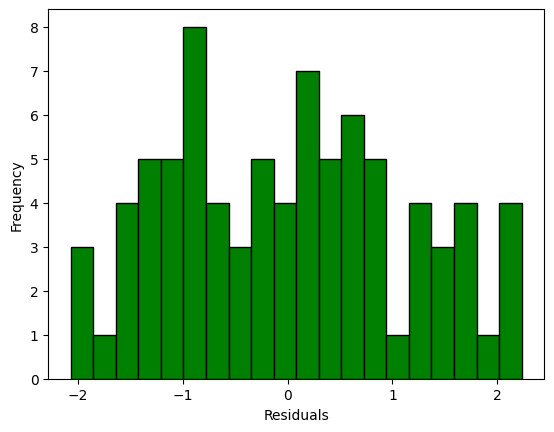

Standard Deviation of Residuals: 1.1149585458353035


In [6]:
# initializing residuals 
residuals = residual(y_fit,waveheight)

#ploting histogram
plt.hist(residuals, bins= 20, color='green',edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('residuals_histogram.pdf')
plt.show()

# calculating annd outputing standard deviation
st_dev = np.std(residuals)

print(f"Standard Deviation of Residuals: {st_dev}")